# Assignment 3 
António Maschio

# Question 1: Joint Prior
The joint prior can be expressed as:

$ p_{prior}(\textbf{d}, \textbf{m}, k) = p_{k}(k) \cdot p_d(d) \cdot p_{m|k}(m|k)$

The two models are to be a priori equally acceptable. Therefore,   the expression for $p_{k}(k)$:

$p_{k}(k) = \begin{cases} 1/2 \quad \text{for k=1} \\ 1/2 \quad \text{for k=2} \end{cases}$

The noise for each gravity measurement is uniformly distributed in $[-\sigma,\sigma]$  :

$p_d(d) = \left( \dfrac{1}{2\sigma} \right)^2 $

Finally for $p_{m|k}(m|k)$ values are also uniformly distributed in range $[-500,0]$, for each model parameter.

$
p_{m|k}(m|k) = \begin{cases} 500^{-1} & \text{for } k=1 \\ 500^{-2}  & \text{for } k=2 \end{cases}
$

Combining all:

$
p_{prior} = \begin{cases} 
\dfrac{1}{2} \cdot \left( \dfrac{1}{2\sigma} \right)^2 \cdot 500^{-1} & \text{for } k=1 \quad \Delta \rho \in [-500,0] \quad d \in [d-\sigma,d+\sigma]^2 \\ 
\dfrac{1}{2} \cdot \left( \dfrac{1}{2\sigma} \right)^2 \cdot 500^{-2} & \text{for } k=2 \quad \Delta \rho^{(n)} \in [-500,0]^2 \quad d \in [d-\sigma,d+\sigma]^2
\end{cases}
$


# Question 2: Joint posterior


## Equations for k=1

$ \Delta g = 2 \pi G \Delta \rho ((b_{top}-h_{top})-(b_{bot}-h_{bot})) $

defining this auxiliar:

$\alpha _n = (b_{top}-h_{top})-(b_{bot}-h_{bot})$ for cylinder n

$\Delta \rho = \dfrac {\Delta g}{2 \pi G \alpha} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G

In [2]:
def get_b_conaltura(altura):
    return np.sqrt(altura**2 + 4700**2)

def compute_a(ht, hb):
    return ((get_b_conaltura(ht) - ht) - (get_b_conaltura(hb) - hb))

def model_1(g,ht,hb):
    cte = 2*np.pi* G
    var = g / (compute_a(ht, hb))
    return var/cte

In [3]:
# Data

# k==1 param
p1_ht = 1000
p1_hb = 5400

p2_ht = p1_ht-500
p2_hb = p1_hb-500

# k==2 param
p1_ht1 = 1000
p1_hb1 = 4000
p1_ht2 = 4000
p1_hb2 = 5400

p2_ht1 = p1_ht1 - 500
p2_hb1 = p1_hb1 - 500
p2_ht2 = p1_ht2 - 500
p2_hb2 = p1_hb2 - 500

#measuremenststgazoufnadsidjom

p1_measure = -0.00021453
p2_measure = -0.00024499

sigma = 0.00001

In [4]:
# Results k=1

r1_max = model_1(p1_measure+sigma,p1_ht,p1_hb)
r1_min = model_1(p1_measure-sigma,p1_ht,p1_hb)

r2_max = model_1(p2_measure+sigma,p2_ht,p2_hb)
r2_min = model_1(p2_measure-sigma,p2_ht,p2_hb)

print("r1")
print(r1_max)
print(r1_min)
print("\n")
print("r2")
print(r2_max)
print(r2_min)

r1
-238.34343149125507
-261.64988350232977


r2
-239.79382782844485
-260.20268163741076


The r2 results will be the ones used.

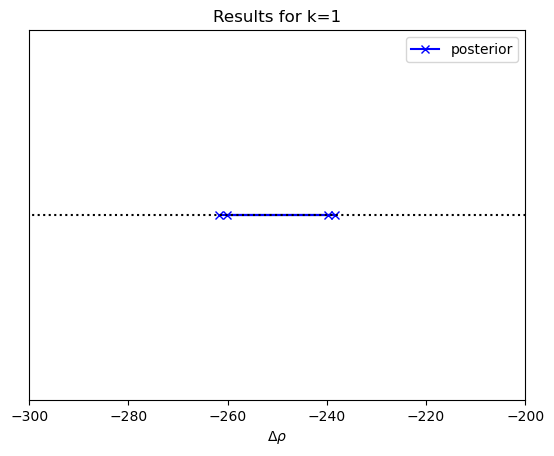

In [5]:
x_values = np.array([r1_min, r1_max, r2_min, r2_max])
y_values = np.zeros(len(x_values))
# Create the plot
plt.figure()

prior = np.linspace(-500,0)
zeros = np.zeros(len(prior))
# Plot the line with markers
plt.plot(x_values, y_values, marker='x', linestyle='-', color='b', label='posterior')
plt.plot(prior, zeros, linestyle=':', color='black')
plt.gca().axes.yaxis.set_visible(False)
# Set the title and labels
plt.title("Results for k=1")
plt.xlabel("$\Delta \\rho$")
plt.xlim((-300,-200))
# Show the plot
plt.legend()
plt.show()



$p_{prior} = \dfrac{1}{2} \cdot \left( \dfrac{1}{2\sigma} \right)^2 \cdot 500^{-1} \quad \text{for } k=1, \quad \Delta \rho \in [-260.20, -239.79] \quad d \in [d - \sigma, d + \sigma]^2 $


## Equations for k=2
$ \Delta g = 2 \, \pi \, G \, (\Delta \rho _1 \cdot \alpha _1 + \Delta \rho _2 \cdot \alpha _2 ) $

$\alpha _n = (b_{top}-h_{top})-(b_{bot}-h_{bot})$ for the n cylinder

$ \Delta \rho _1 = \dfrac {\Delta g - 2 \, \pi \, G \, \alpha _2 \cdot \Delta \rho _2 }{2 \, \pi \, G \, \alpha _1} $

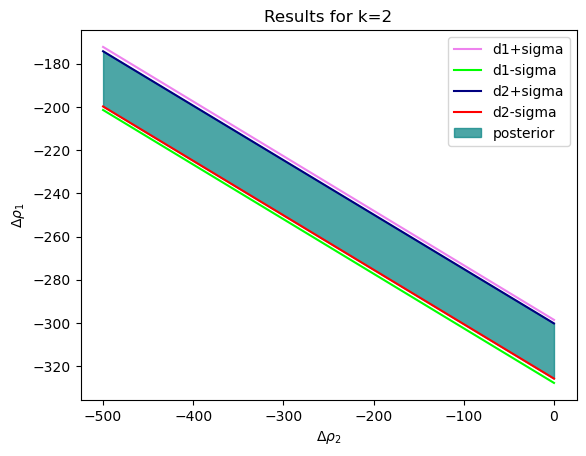

In [6]:
def get_b_conaltura(altura):
    return np.sqrt(altura**2 + 4700**2)

def compute_a(ht, hb):
    return ((get_b_conaltura(ht) - ht) - (get_b_conaltura(hb) - hb))


def model_2(g,ht1,hb1,ht2,hb2, r):
    cte = 2*np.pi*G

    ft = g/(cte * compute_a(ht1,hb1))

    up =(cte * compute_a(ht2,hb2) * r)
    down = cte * compute_a(ht1,hb1)
    st = up/down

    return ft - st

x = np.linspace(-500,0)

# Plot d1 lines (for reference)
plt.plot(x,model_2(p1_measure+sigma,p1_ht1,p1_hb1,p1_ht2,p1_hb2,x), color='violet',label='d1+sigma')
plt.plot(x,model_2(p1_measure-sigma,p1_ht1,p1_hb1,p1_ht2,p1_hb2,x), color='lime',label='d1-sigma')

y_upper = model_2(p2_measure+sigma,p2_ht1,p2_hb1,p2_ht2,p2_hb2,x)
y_lower = model_2(p2_measure-sigma,p2_ht1,p2_hb1,p2_ht2,p2_hb2,x)


plt.plot(x, y_upper, color='navy',label='d2+sigma')
plt.plot(x, y_lower, color='r',label='d2-sigma')


plt.fill_between(x, y_upper, y_lower, color='teal', alpha=0.7, label='posterior')

plt.title("Results for k=2")

# plt.hlines(-300,-500,0)

plt.xlabel("$\Delta \\rho_2$")
plt.ylabel("$\Delta \\rho_1$")

plt.legend()
plt.show()


Results


For \($\Delta \rho_2$\):

$\Delta \rho_2 \in [0, 500]$


 For \($\Delta \rho_1$\):

 
$\dfrac{\Delta g_2^{\text{min}} - 2 \pi G \alpha_2 \Delta \rho_2}{2 \pi G \alpha_1} 
< \Delta \rho_1 < 
\dfrac{\Delta g_2^{\text{max}} - 2 \pi G \alpha_2 \Delta \rho_2}{2 \pi G \alpha_1}$

Applying the new relation to the expression:

$p_{prior} = \dfrac{1}{2} \cdot \left( \dfrac{1}{2\sigma} \right)^2 \cdot 500^{-2} \quad \text{for } k=2 \quad d \in [d - \sigma, d + \sigma]^2 \quad \text{and} \quad \Delta \rho _2 \in [-500,0] \quad \text{and} \quad  \dfrac{\Delta g_2^{min} - 2 \, \pi \, G \, \alpha _2 \Delta \rho _2} {2 \, \pi \, G \alpha _1} <\Delta \rho _1< \dfrac{\Delta g_2^{max} - 2 \, \pi \, G \, \alpha _2 \Delta \rho _2} {2 \, \pi \, G \alpha _1}$


Below I calculated the actual values.

In [7]:
#calculations of values for boundaries
def first_term_aux(g,ht1,hb1,ht2,hb2, r):
    cte = 2*np.pi*G

    ft = g/(cte * compute_a(ht1,hb1))

    return ft

y_upper = first_term_aux(p2_measure+sigma,p2_ht1,p2_hb1,p2_ht2,p2_hb2,x)
y_lower = first_term_aux(p2_measure-sigma,p2_ht1,p2_hb1,p2_ht2,p2_hb2,x)

print(y_upper)
print(y_lower)

#calculations for boundaries

def second_term_aux(g,ht1,hb1,ht2,hb2, r=1):
    cte = 2*np.pi*G

    up =(cte * compute_a(ht2,hb2) * r)
    down = cte * compute_a(ht1,hb1)
    st = up/down

    return st

y_upper = second_term_aux(p2_measure+sigma,p2_ht1,p2_hb1,p2_ht2,p2_hb2)
y_lower = second_term_aux(p2_measure-sigma,p2_ht1,p2_hb1,p2_ht2,p2_hb2)

print(y_upper)
print(y_lower)

-300.2194802538625
-325.77116162361125
0.25199002398280174
0.25199002398280174


$-325,77 - 0,25 \Delta \rho _2 < \Delta \rho _1 < -300,22 - 0,25 \Delta \rho _2 $

# Question 3
## Integrate posterior distribution


In [8]:
# Auxiliar calculation to get integral values
x = 20.41/2/500/4/sigma/sigma
print(x,"k=1 intergral result") 
cte = 2*np.pi*G
alpha1 = compute_a(p2_ht1,p2_hb1)
x2= 1/4/sigma/alpha1/cte/500
print(x2,"k=2 intergral result") 

51024999.99999999 k=1 intergral result
63879203.42437177 k=2 intergral result


First it was calculated for k=1:
$ \begin{gather}\int P_{post}(m,1) dm   \Rightarrow \int_{-260.20}^{-239.79} \dfrac{1}{2}\dfrac{1}{4\sigma^2}\dfrac{1}{500} dm   = 20,41 \cdot 2,5 \times 10^6 = 5.10 \times 10^7 \end{gather}$

Then for k=2:

$ \begin{gather}\int_{\Delta P} P_{post}(m,2) dm   \Rightarrow \int_{-500}^{0} \int_{\frac{\Delta g_2^{min} - 2 \, \pi \, G \, \alpha _2 \Delta \rho _2} {2 \, \pi \, G \alpha _1} } ^{\frac{\Delta g_2^{max} - 2 \, \pi \, G \, \alpha _2 \Delta \rho _2} {2 \, \pi \, G \alpha _1}}\dfrac{1}{2}\dfrac{1}{4 \sigma ^2}\dfrac{1}{500^2} dm   = \frac{1}{2} \frac{1}{4\sigma^2} \frac{1}{500^2} 500 \cdot \frac{2\sigma}{ 2 \, \pi \, G \alpha _1} = 6.39 \times 10^7 \end{gather}$

With the results above we can deduce that the model with k=2 has the highest posterior probability.